<a href="https://colab.research.google.com/github/AliRizvi14/Machine_Learning/blob/main/heart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib as mt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score,StratifiedKFold
from sklearn.metrics import make_scorer, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import f1_score as f1
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from collections import Counter
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from matplotlib import pyplot as plt
from sklearn.utils.extmath import randomized_range_finder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/AliRizvi14/CE888_workspace/main/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab0b480350>,
      dtype=object)

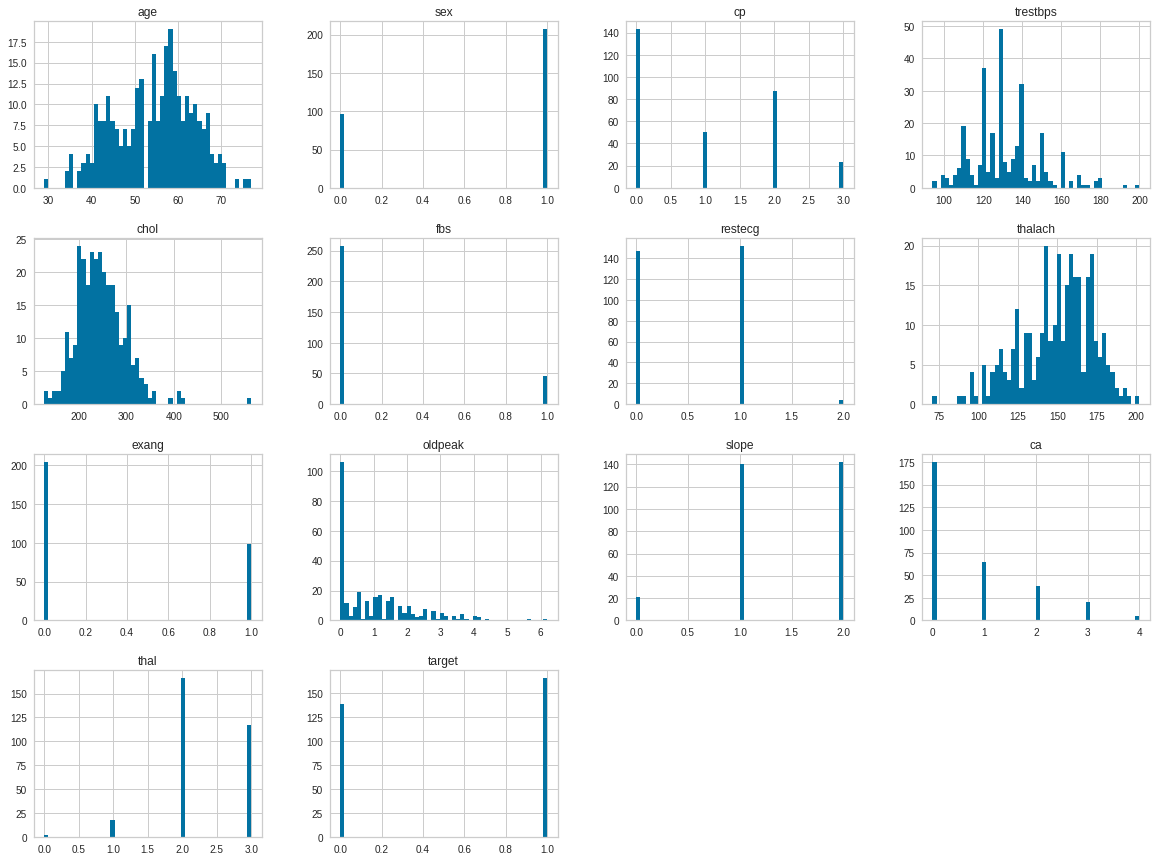

In [ ]:
df.hist(bins=50, figsize=(20,15))

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
imbalance=len(df[df['target'] == 0])/len(df)*100 # Calculating Imbalance in the dataset
imbalance

45.54455445544555

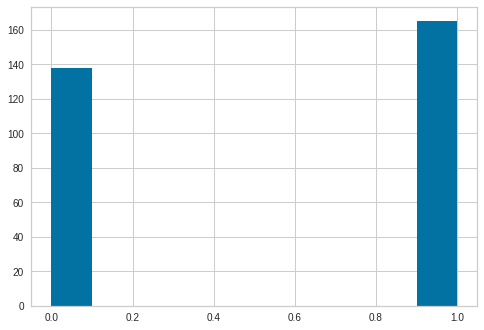

In [ ]:
df['target'].hist()

In [ ]:
y=df['target'].copy()
x=df.drop(['target'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')

Distribution before imbalancing: Counter({1: 165, 0: 138})


In [ ]:
x_b, y_b = make_imbalance(x, y,                                         # Low Imbalance (65%)
                              sampling_strategy={0: 88, 1: 165},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_b)}')

Distribution after imbalancing: Counter({1: 165, 0: 88})


In [ ]:
y_b.value_counts()

1    165
0     88
Name: target, dtype: int64

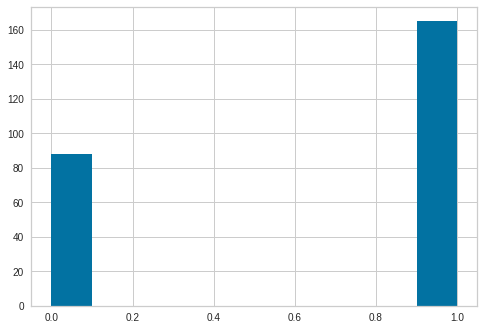

In [ ]:
y_b.hist()  #low Imbalance

In [ ]:
x_b1, y_b1 = make_imbalance(x, y,                                         # Medium Imbalance (75%)

                              sampling_strategy={0: 55, 1: 165},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_b1)}')

Distribution after imbalancing: Counter({1: 165, 0: 55})


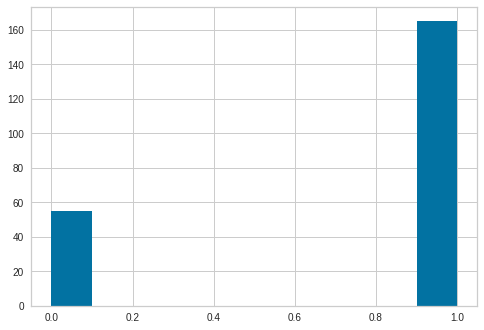

In [ ]:
y_b1.hist()  # Medium Imbalance

In [ ]:
x_b2, y_b2 = make_imbalance(x, y,                                         # High Imbalance (90%)
                              sampling_strategy={0: 18, 1: 165},

                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_b2)}')

Distribution after imbalancing: Counter({1: 165, 0: 18})


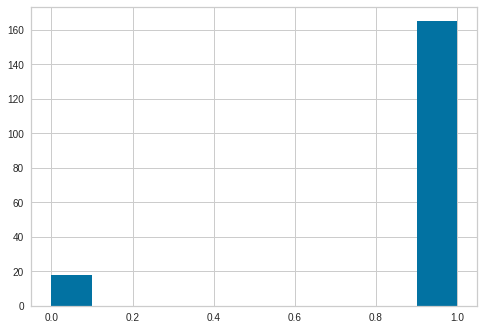

In [ ]:
y_b2.hist()  # High Imbalance

In [ ]:
def metric_score(x ,y):

  model=RandomForestClassifier()                                          # baseline classifier 
  metric=[]                                                                     # array to store measured metric 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(x,y)

  for train_index,test_index in skf.split(x,y):

    
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]                     # 4 surrogates of data are created training and test data 
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    model.fit(x_train,y_train)                                            # model is fitted with training data 
    predict=model.predict(x_test)                                            # model is tested on test data 
    my_score=f1_score(predict,y_test)
    metric.append(my_score)                                                        # scores obtained for 10 iterations are stored in a array 
  
  metric=np.array([metric]) 
  print( "F1 Score for 10 iterations is given by :")                            # metric is converted to numpy array 
  print( metric)                                                                # All 10 scores for 1 iterations are displayed here 
  print("\n")

  print( "Mean F1 Score :")                                                     
  print(np.mean(metric))                                                        # mean of 10 scores is diplayed here
  print("\n")
  
  print( "standard Deviation of F1 Score :")
  print(np.std(metric))                                                        # standard deviation of 10 scores is diplayed here
  print("\n")


  result=pd.DataFrame(classification_report(y_test, predict, output_dict=True))
  display(result)
  




In [ ]:
metric_score(x,y)  


F1 Score for 10 iterations is given by :
[[0.89473684 0.85714286 0.86486486 0.90909091 0.91891892 0.8
  0.78787879 0.85714286 0.77777778 0.78787879]]


Mean F1 Score :
0.8455432602801023


standard Deviation of F1 Score :
0.05079513468010026




,0,1,accuracy,macro avg,weighted avg
precision,0.769231,0.764706,0.766667,0.766968,0.766817
recall,0.714286,0.812500,0.766667,0.763393,0.766667
f1-score,0.740741,0.787879,0.766667,0.764310,0.765881
support,14.000000,16.000000,0.766667,30.000000,30.000000


In [ ]:
metric_score(x_b,y_b) 

F1 Score for 10 iterations is given by :
[[0.83333333 0.88888889 1.         0.90909091 0.78787879 0.9375
  0.90909091 0.8125     0.91891892 0.86486486]]


Mean F1 Score :
0.8862066612066613


standard Deviation of F1 Score :
0.06004722971265424




,0,1,accuracy,macro avg,weighted avg
precision,0.800000,0.800000,0.8,0.800000,0.800000
recall,0.500000,0.941176,0.8,0.720588,0.800000
f1-score,0.615385,0.864865,0.8,0.740125,0.785031
support,8.000000,17.000000,0.8,25.000000,25.000000


In [ ]:
metric_score(x_b1,y_b1)

F1 Score for 10 iterations is given by :
[[0.82352941 0.83333333 0.94117647 0.96969697 0.96774194 0.88235294
  0.91428571 0.82352941 1.         0.94117647]]


Mean F1 Score :
0.9096822658682242


standard Deviation of F1 Score :
0.06209317566137321




,0,1,accuracy,macro avg,weighted avg
precision,0.8,0.941176,0.909091,0.870588,0.909091
recall,0.8,0.941176,0.909091,0.870588,0.909091
f1-score,0.8,0.941176,0.909091,0.870588,0.909091
support,5.0,17.000000,0.909091,22.000000,22.000000


In [ ]:
metric_score(x_b2,y_b2)

F1 Score for 10 iterations is given by :
[[0.91428571 0.97142857 0.94444444 0.94117647 0.90909091 0.96969697
  0.94117647 0.94117647 0.97142857 1.        ]]


Mean F1 Score :
0.9503904592139886


standard Deviation of F1 Score :
0.02649208469083894




,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,1.0,17.0,1.0,18.0,18.0


In [ ]:
def K_value(x):  
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(2,12), scoring='silhouette', timings=True)
  visualizer.fit(x)        # Fit the data to the visualizer
  visualizer.show()
  plot = SilhouetteVisualizer(model, colors='yellowbrick')
  plot.fit(x)        # Fit the data to the visualizer
  plot.show()        # Finalize and render the figure
  return visualizer.elbow_value_

In [ ]:
def classification(x ,y):
  sk=StratifiedKFold(n_splits=10,random_state=None)                            # apply stratified cross validation 
  sk.get_n_splits(x,y)

  for train_index,test_index in sk.split(x,y):

    
    x1_train,x1_test=x.iloc[train_index],x.iloc[test_index]                   # splitting data into training and test data 
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    sc = StandardScaler()
    x1_train = sc.fit_transform(x1_train)                                           #Perform scaler
    x1_test = sc.transform(x1_test)
  
  k=K_value(x1_train)
  print("Minimum K value obtain by elbow and silhoutte method ",k)
  

  km = KMeans(n_clusters=k)                                                # Applying K means to find number of cluster 
  km.fit(x1_train)  
  labels = km.predict(x1_test)  
  centroids  = km.cluster_centers_                                          # compute centroids of clusters 
  cluster=km.labels_

  x1_train_new=pd.DataFrame(x1_train)
  x1_train_new['Cluster_number'] = cluster
  x1_train_new['label_variable']=  y1_train
  x1_train_new.dropna(axis=0,inplace=True)
  
  for i in range (len(centroids)) :
     print("Centroid of cluster " + str(i)+ " = " +str(centroids[i,:].mean()))          #printing centroid value for each cluster
      
     cl= x1_train_new['label_variable'].loc[(x1_train_new['Cluster_number'] == i) ]
     print(cl.value_counts())
     print("----------------------------------------------")

  rf=RandomForestClassifier()                                                           #training random forest for minority class
  sol= np.zeros(len(y1_test))
  f1=[]
  for j in range (len(centroids)):
     min = x1_train_new.loc[(x1_train_new['Cluster_number'] == j) ]
     min.dropna(subset=['label_variable'],inplace=True)

     if min['label_variable'].nunique() > 1:
        y1=min['label_variable']
        x1=min.drop(['label_variable', 'Cluster_number'], axis=1)
        rf.fit(x1,y1)                                                                  # model is fitted with training data 

        for k in range (len(labels)):
          if labels[k]==j:
            sol[k]=rf.predict(np.reshape(x1_test[k],(1,-1)))
     
     f1.append(f1_score(y1_test,sol))
     print("------------------------------------------------")
  for f in range(len(f1)):
    print("F1 Score on cluster "+ str(f)+ " is given by :"+str(f1[f]))   

  f1=np.array([f1])
  print("------------------------------------------------------")

  print( "Mean F1 Score :")                                                         #compute means value
  print(np.mean(f1))                                                        
  print("-------------------------------------------------------")
  print( "standard Deviation of F1 Score :")
  print(np.std(f1))                                                                # standard deviation of  scores is diplayed here
  print("-------------------------------------------------------")
                                                         
  result=pd.DataFrame(classification_report(y1_test, sol, output_dict=True))
  print('--------------------------------------------------------')
  print(result)
  print(result.to_latex(index=True,bold_rows=True))

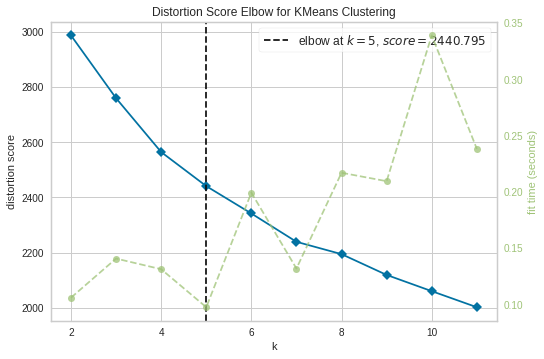

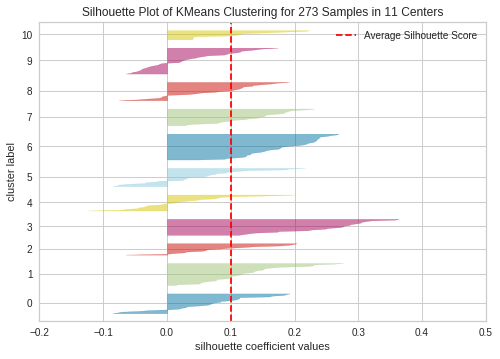

Minimum K value obtain by elbow and silhoutte method  5
Centroid of cluster 0 = -0.22194779975276774
1.0    51
0.0     7
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 1 = 0.06108423639334519
0.0    57
1.0     5
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 2 = -0.14059848592695479
1.0    46
0.0     6
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 3 = 0.26963586395509176
1.0    23
0.0    13
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 4 = 0.10923969786874622
0.0    25
1.0    24
Name: label_variable, dtype: int64
----------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
F1 Score on cluster 0 is given by :0.47619047619047616
F1 Score on cluster 1 is given by :0.47619047619047616
F1 Score on cluster 2 is given by :0.7142857142857143
F1 Score on cluster 3 is given by :0.7142857142857143
F1 Score on cluster 4 is given by :0.8484848484848485
------------------------------------------------------
Mean F1 Score :
0.645887445887446
-------------------------------------------------------
standard Deviation of F1 Score :
0.1469669873322888
-------------------------------------------------------
--------------------------------------------------------
                   0          1  accuracy  macro avg  weighted avg
precision   0.846154   0.823529  0.833333   0.834842      0.834087
recall      0.785714   0.875000  0.833333   0.830357      0.833333
f1-score    0.814815   0.848485  0.833333   0.831650      0.832772
support    14.000000  16.000000  0.833333  30.000000     30.000000
\begin{tabular}{lrrrrr}
\toprule
{

In [ ]:
classification(x,y)

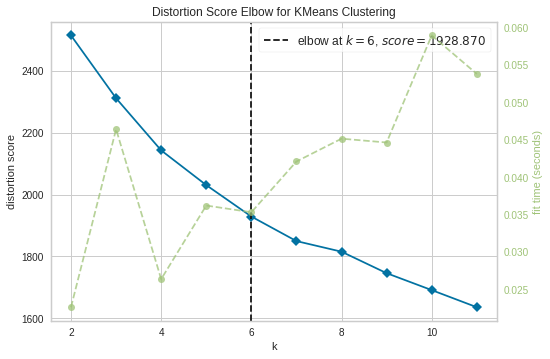

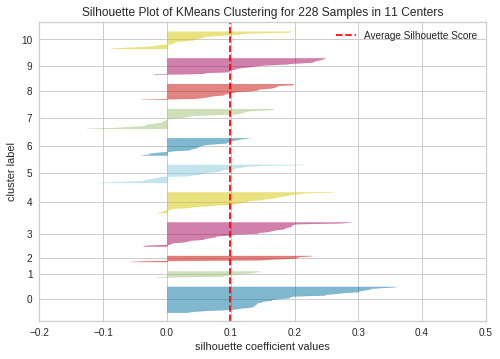

Minimum K value obtain by elbow and silhoutte method  6
Centroid of cluster 0 = 0.1300797493933729
0.0    14
1.0     5
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 1 = 0.28925560510988485
1.0    17
0.0     8
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 2 = -0.04626279436537192
1.0    33
0.0     5
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 3 = 0.08183130121630655
1.0    19
0.0    16
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 4 = -0.18303057378551973
1.0    60
0.0     3
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 5 = 0.016143716328072898
0.0    34
1.0     6
Name: label_variable, dtype: int64
----------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------
F1 Score on cluster 0 is given by :0.0
F1 Score on cluster 1 is given by :0.3636363636363636
F1 Score on cluster 2 is given by :0.7741935483870968
F1 Score on cluster 3 is given by :0.7500000000000001
F1 Score on cluster 4 is given by :0.8888888888888888
F1 Score on cluster 5 is given by :0.8888888888888888
------------------------------------------------------
Mean F1 Score :
0.610934614966873
-------------------------------------------------------
standard Deviation of F1 Score :
0.32529662010612204
-------------------------------------------------------
--------------------------------------------------------
                  0          1  accuracy  macro avg  weighted avg
precision  0.833333   0.842105      0.84   0.837719      0.839298
recall     0.625000   0.941176      0.84   0.783088      0.840000
f1-score   0.714286   0.888889      0.84   0.801587      0.833016
support    8.00000

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
classification(x_b,y_b)                           # classification on 65% imbalance dataset

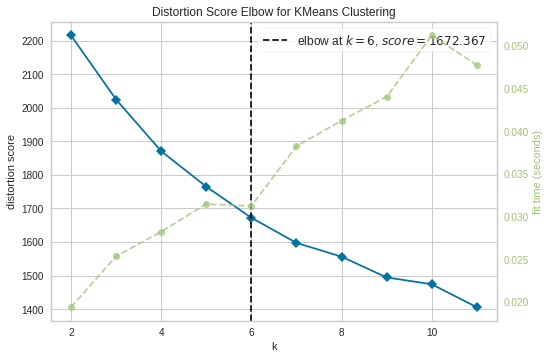

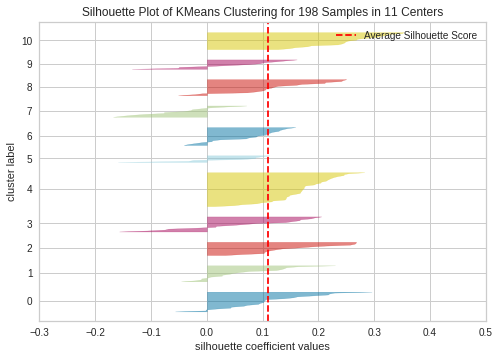

Minimum K value obtain by elbow and silhoutte method  6
Centroid of cluster 0 = 0.009810305274155674
1.0    47
0.0     8
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 1 = 0.08463352985402937
0.0    26
1.0     5
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 2 = 0.008148170750567008
1.0    14
0.0     5
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 3 = -0.32876717323447036
1.0    40
0.0     1
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 4 = 0.1493500065986141
1.0    19
0.0     7
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 5 = 0.3061895645986699
1.0    18
0.0     3
Name: label_variable, dtype: int64
----------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------
F1 Score on cluster 0 is given by :0.2857142857142857
F1 Score on cluster 1 is given by :0.2857142857142857
F1 Score on cluster 2 is given by :0.3636363636363636
F1 Score on cluster 3 is given by :0.7142857142857143
F1 Score on cluster 4 is given by :0.7741935483870968
F1 Score on cluster 5 is given by :0.9142857142857143
------------------------------------------------------
Mean F1 Score :
0.5563049853372434
-------------------------------------------------------
standard Deviation of F1 Score :
0.2530294416856462
-------------------------------------------------------
--------------------------------------------------------
                  0          1  accuracy  macro avg  weighted avg
precision  0.750000   0.888889  0.863636   0.819444      0.857323
recall     0.600000   0.941176  0.863636   0.770588      0.863636
f1-score   0.666667   0.914286  0.863636   0.790476      0.858009
sup

In [ ]:
classification(x_b1,y_b1) 

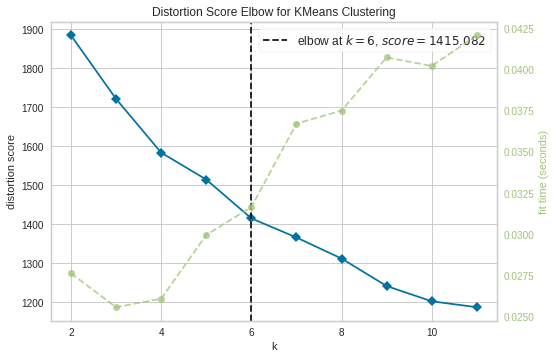

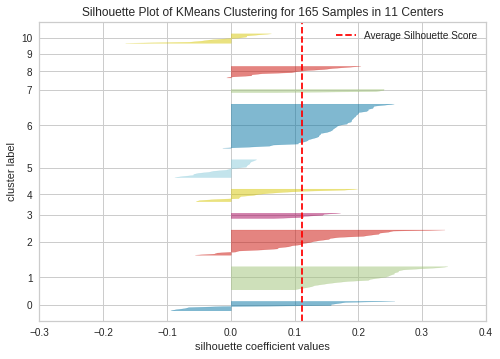

Minimum K value obtain by elbow and silhoutte method  6
Centroid of cluster 0 = -0.354103953768048
1.0    34
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 1 = 0.30712077734204507
1.0    18
0.0     1
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 2 = 0.08313656153233961
1.0    15
0.0     8
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 3 = 0.12294732323194632
1.0    25
0.0     2
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 4 = 0.05857342681187361
1.0    13
0.0     3
Name: label_variable, dtype: int64
----------------------------------------------
Centroid of cluster 5 = 0.0007683953721400925
1.0    42
0.0     3
Name: label_variable, dtype: int64
----------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


------------------------------------------------
------------------------------------------------
------------------------------------------------
F1 Score on cluster 0 is given by :0.0
F1 Score on cluster 1 is given by :0.38095238095238093
F1 Score on cluster 2 is given by :0.45454545454545453
F1 Score on cluster 3 is given by :0.6399999999999999
F1 Score on cluster 4 is given by :0.6153846153846153
F1 Score on cluster 5 is given by :0.7586206896551724
------------------------------------------------------
Mean F1 Score :
0.4749171900896038
-------------------------------------------------------
standard Deviation of F1 Score :
0.2457172622380421
-------------------------------------------------------
--------------------------------------------------------
             0          1  accuracy  macro avg  weighted avg
precision  0.0   0.916667  0.611111   0.458333      0.865741
recall     0.0   0.647059  0.611111   0.323529      0.611111
f1-score   0.0   0.758621  0.611111   0.379310  

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
classification(x_b2,y_b2) 

In [ ]:
----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
def elbow_graph(x_b,y_b):
  print("In Elbow method, where Elbow appears can be seen by the graph below:\n" )
  plt.xlabel('Range of K')
  plt.title('Elbow Method')
  plt.ylabel('Sum of Squared Error (Inertias)')
  k_range = range(1,10)
  plt.plot(x_b,y_b)
  plt.show()

In [ ]:
def elbowgraph(x):  
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(2,12), scoring='silhouette')

  visualizer.fit(x)        # Fit the data to the visualizer
  visualizer.show()
  viz = SilhouetteVisualizer(model, colors='yellowbrick')
  viz.fit(x)        # Fit the data to the visualizer
  viz.show()        # Finalize and render the figure

  return visualizer.elbow_value_

In [ ]:
def plotting(x,y):
    sse = []
    k_rng = range(1,10)
    for k in k_rng:
        km = KMeans(n_clusters=k)
        a=km.fit(X1_train)
        sse.append(km.inertia_)
    k_range = range(1,10)
    elbow_graph(k_range,sse)
    K=elbowgraph(X1_train)
    return K

In [ ]:
plotting(x_train,y_test)

In [ ]:
def center(k,xtrain,xtest):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(xtrain)  
  labels = kmeans.predict(xtest)  
  centroids  = kmeans.cluster_centers_                                          # evaluating centroids of clusters 
  cluster=kmeans.labels_
  for i in range (len(centroids)) :
     print("Centroid of cluster " + str(i)+ " = " +str(centroids[i,:].mean()))
  return centroids

In [ ]:
center(k,X1_train,X1_test)

In [ ]:
from sklearn.utils.extmath import randomized_range_finder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
model=RandomForestClassifier()
accuracy=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(x_b,y_b)

for train_index,test_index in skf.split(x_b,y_b):
  X1_train,X1_test=x_b.iloc[train_index],x_b.iloc[test_index]
  y1_train,y1_test=y_b.iloc[train_index],y_b.iloc[test_index]
  model.fit(X1_train,y1_train)
  prediction=model.predict(X1_test)
  score=f1_score(prediction,y1_test)
  accuracy.append(score)
print(len(accuracy))
accuracy=np.array([accuracy])
print(accuracy)
print(np.mean(accuracy))
print(len(X1_train))
print(len(X1_test))
print(len(x_b))



In [ ]:
import numpy as np
np.array(accuracy).mean()

In [ ]:
X1_train

In [ ]:
from sklearn.cluster import KMeans
# KM=KMeans(n_clusters=5)
# KM.fit(X1_train,y1_train)
# y_predict=KM.predict(X1_test)
# y_predict

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    a=km.fit(X1_train)
    sse.append(km.inertia_)


In [ ]:
a

In [ ]:
sse

In [ ]:
plt.xlabel('K')
plt.title('Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km.labels_

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X1_train, km.labels_)

In [ ]:
sil_score=[]
K_means_k=[KMeans(n_clusters=K,random_state=42).fit(X1_train) for K in range(1,10)]
# for K in range(1,10):
#   KM=KMeans(n_clusters=K,random_state=42)
#   K_means_K=KM.fit(X1_train)

for model in K_means_k[1:]:
  sil_score.append(silhouette_score(X1_train,model.labels_))


In [ ]:
sil_score

In [ ]:
k_rng = range(1,9)
plt.xlabel('K')
plt.title('Silhouette Method')
plt.ylabel('Silhouette Score')
plt.plot(k_rng,sil_score)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X1_train)   #data is of shape [1000,]
#learn the labels and the means
labels = kmeans.predict(X1_train)  #labels of shape [1000,] with values 0<= i <= 9

centroids  = kmeans.cluster_centers_  #means of shape [10,]
c1=centroids[0,:].mean()
c2=centroids[1,:].mean()
print(c1,c2)


In [ ]:
CLUSTER=kmeans.labels_
print(type(CLUSTER))

In [ ]:

df3=pd.DataFrame(X1_train)
df3['Cluster'] = CLUSTER
df3['label']=y1_train
df3

In [ ]:
# min=df3.where(df3['Cluster'] == 1)
# min.dropna(axis=0)
# min

In [ ]:
Cls1=df3[df3.Cluster==1]

print(Cls1['label'].value_counts())
Cls1

In [ ]:
Cls0=df3[df3.Cluster==0]
print(Cls0['label'].value_counts())
Cls0

In [ ]:
dist=[]
df4=pd.DataFrame(X1_test)
dist=np.linalg.norm(df4.sub(np.array(c1)), axis=1)